In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
os.getcwd()
os.chdir('/Users/ashar/Desktop/rossmann-store-sales')

In [3]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
#Check NaNs in the store file 
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [5]:
train = pd.read_csv('train.csv', parse_dates=[2])
train.info()
print('-------------------Next is Test info-------------------------')
test = pd.read_csv('test.csv', parse_dates=[3])
test.info()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
-------------------Next is Test info-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null datetime64[ns]
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object


In [6]:
store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [7]:
#Filling NA's with 0 instead of median
store.fillna(0, inplace=True)

In [8]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
train['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

Text(0.5,1,'Store 10 Sales Distribution')

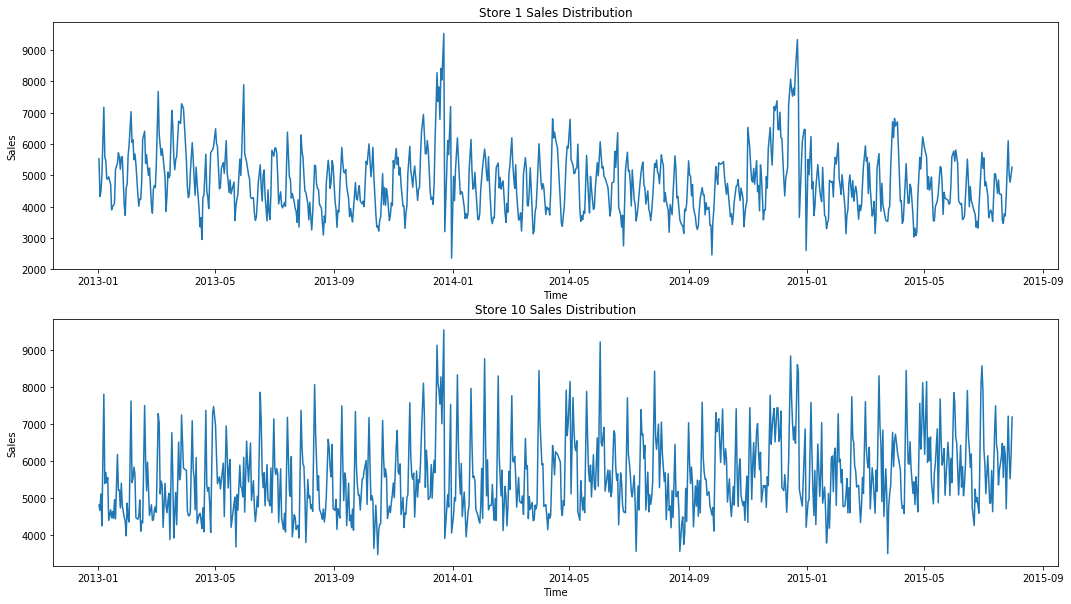

In [10]:
# draw store 1 and store 10 sales distribution plot
import matplotlib.pyplot as plt
store_1 = train.loc[(train["Store"]==1)&(train['Sales']>0), ['Date',"Sales"]]
store_10 = train.loc[(train["Store"]==10)&(train['Sales']>0), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

In [11]:
store_1.info()
print('----------------------------------------')
store_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 1014980
Data columns (total 2 columns):
Date     781 non-null datetime64[ns]
Sales    781 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.3 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 9 to 1014989
Data columns (total 2 columns):
Date     784 non-null datetime64[ns]
Sales    784 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.4 KB


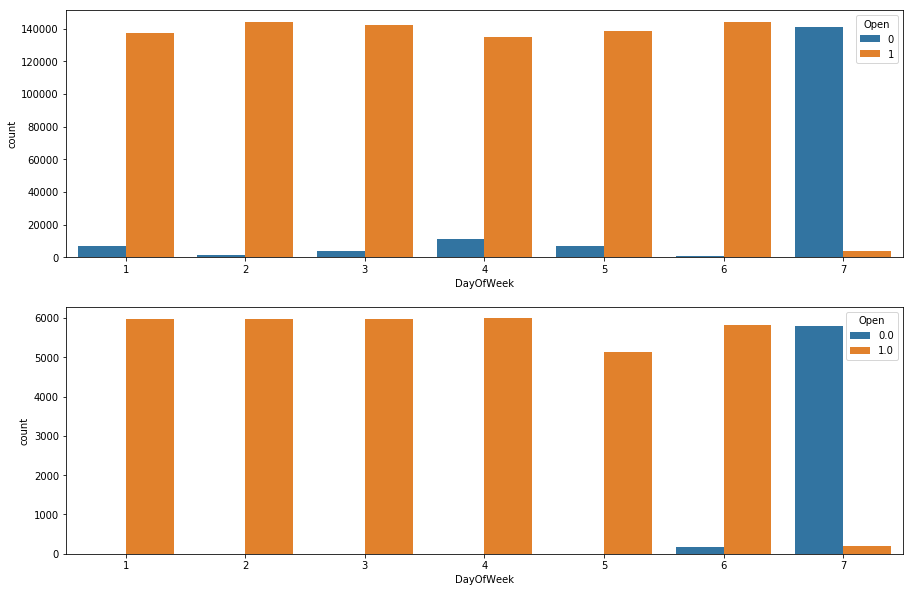

In [12]:
#Let's check how many stores are open on each day 
import seaborn as sns 
f, ax = plt.subplots(2,figsize=(15,10))
sns.countplot(data=train, x = 'DayOfWeek', hue = 'Open', ax=ax[0])
sns.countplot(data=test, x='DayOfWeek', hue='Open', ax= ax[1])

In [13]:
#Checking nulls in test data 

test.isnull().sum() # there are 11 NaNs in open column 


print('----Lets fill these NaNs with 1 ')

test['Open'].fillna(1, inplace=True)
test.isnull().sum()

----Lets fill these NaNs with 1 


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
# merge data with store 
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

# split the last 6 weeks data as hold-out set 
train = train.sort_values(['Date'],ascending = False)
train_total = train.copy()

split_index = 6*7*1115
valid = train[:split_index] 
train = train[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.Open != 0)&(valid.Sales >0)]
train = train[(train.Open != 0)&(train.Sales >0)]
train_total = train_total[(train_total.Open != 0)&(train_total.Sales >0)]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


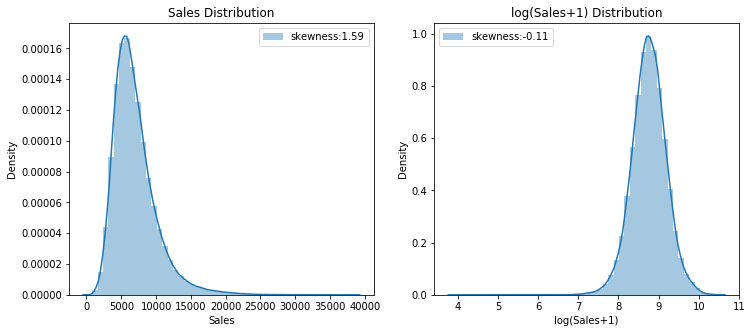

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# checking distribution of sales in train set
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(train['Sales'],hist = True,label='skewness:{:.2f}'.format(train['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(train['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(train['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [16]:
def process(data, isTest = False):
    # label encode some features
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    # extract some features from date column  
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    # calculate competiter open time in months
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
    
    # calculate promo2 open time in months
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data['PromoOpen'].apply(lambda x: x if x > 0 else 0)
                                                 
    # Indicate whether the month is in promo interval
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['month_str'] = data.Month.map(month2str)

    def check(row):
        if isinstance(row['PromoInterval'],str) and row['month_str'] in row['PromoInterval']:
            return 1
        else:
            return 0
        
    data['IsPromoMonth'] =  data.apply(lambda row: check(row),axis=1)    
    
    # select the features we need
    features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']  
    if not isTest:
        features.append('Sales')
        
    data = data[features]
    return data

train = process(train)
valid = process(valid)
train_total = process(train_total)
x_test = process(test,isTest = True)

In [17]:
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
train_total.sort_index(inplace = True)

# split x and y
x_train, y_train = train.drop(columns = ['Sales']), np.log1p(train['Sales'])
x_valid, y_valid = valid.drop(columns = ['Sales']), np.log1p(valid['Sales'])
x_train_total, y_train_total = train_total.drop(columns = ['Sales']), np.log1p(train_total['Sales'])

In [18]:
# define eval metrics
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [19]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
clf.fit(x_train, y_train)
# validation
y_pred = clf.predict(x_valid)
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSPE: 0.1626


Text(0.5,1,'Feature Importance')

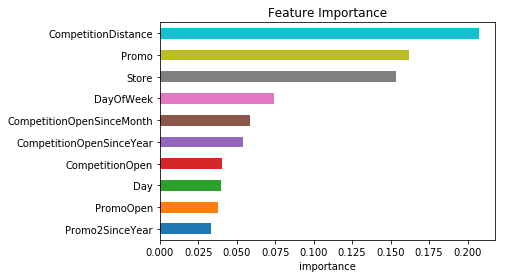

In [20]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [21]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:8.02078	eval-rmse:8.02754	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.78064	eval-rmse:7.78752	train-rmspe:0.999711	eval-rmspe:0.999714
[2]	train-rmse:7.54777	eval-rmse:7.55466	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.32182	eval-rmse:7.32911	train-rmspe:0.999444	eval-rmspe:0.999451
[4]	train-rmse:7.1027	eval-rmse:7.10901	train-rmspe:0.999266	eval-rmspe:0.999274
[5]	train-rmse:6.89012	eval-rmse:6.89692	train-rmspe:0.999054	eval-rmspe:0.999065
[6]	train-rmse:6.68395	eval-rmse:6.69041	train-rmspe:0.9988	eval-rmspe:0.998813
[7]	train-rmse:6.48391	eval-rmse:6.49084	train-rmspe:0.998499	eval-rmspe:0.998516
[8]	train-rmse:6.28995	eval-rmse:6.29732	train-rmspe:0.998143	eval-rmspe:0.998165
[9]	train-rmse:6.10185	eval-rmse:6.10901	train-rmspe:0.997725	eval-rmspe:0.997752
[10]	train-rmse:5.91943	eval-rmse:5.92

[97]	train-rmse:0.48766	eval-rmse:0.479842	train-rmspe:0.378578	eval-rmspe:0.361343
[98]	train-rmse:0.476703	eval-rmse:0.468643	train-rmspe:0.372602	eval-rmspe:0.354728
[99]	train-rmse:0.466043	eval-rmse:0.458123	train-rmspe:0.36682	eval-rmspe:0.348529
[100]	train-rmse:0.455781	eval-rmse:0.448026	train-rmspe:0.36126	eval-rmspe:0.342546
[101]	train-rmse:0.446065	eval-rmse:0.438508	train-rmspe:0.355961	eval-rmspe:0.33686
[102]	train-rmse:0.436628	eval-rmse:0.429042	train-rmspe:0.350898	eval-rmspe:0.331219
[103]	train-rmse:0.42748	eval-rmse:0.420103	train-rmspe:0.345979	eval-rmspe:0.325872
[104]	train-rmse:0.418761	eval-rmse:0.411761	train-rmspe:0.341297	eval-rmspe:0.320928
[105]	train-rmse:0.41033	eval-rmse:0.403455	train-rmspe:0.3368	eval-rmspe:0.31599
[106]	train-rmse:0.402023	eval-rmse:0.395186	train-rmspe:0.332367	eval-rmspe:0.311074
[107]	train-rmse:0.393886	eval-rmse:0.387192	train-rmspe:0.328009	eval-rmspe:0.306344
[108]	train-rmse:0.386517	eval-rmse:0.380163	train-rmspe:0.3241	ev

[193]	train-rmse:0.197628	eval-rmse:0.208117	train-rmspe:0.246647	eval-rmspe:0.221049
[194]	train-rmse:0.196627	eval-rmse:0.207256	train-rmspe:0.245971	eval-rmspe:0.220254
[195]	train-rmse:0.195787	eval-rmse:0.206523	train-rmspe:0.245505	eval-rmspe:0.219552
[196]	train-rmse:0.19555	eval-rmse:0.206431	train-rmspe:0.24549	eval-rmspe:0.219685
[197]	train-rmse:0.195329	eval-rmse:0.206276	train-rmspe:0.245545	eval-rmspe:0.219723
[198]	train-rmse:0.195218	eval-rmse:0.206234	train-rmspe:0.24571	eval-rmspe:0.219874
[199]	train-rmse:0.194339	eval-rmse:0.205436	train-rmspe:0.245103	eval-rmspe:0.219099
[200]	train-rmse:0.193879	eval-rmse:0.205144	train-rmspe:0.244806	eval-rmspe:0.218953
[201]	train-rmse:0.192797	eval-rmse:0.204198	train-rmspe:0.244053	eval-rmspe:0.218146
[202]	train-rmse:0.192363	eval-rmse:0.203875	train-rmspe:0.243807	eval-rmspe:0.218006
[203]	train-rmse:0.191973	eval-rmse:0.203582	train-rmspe:0.243544	eval-rmspe:0.217788
[204]	train-rmse:0.191147	eval-rmse:0.202872	train-rmspe:

[289]	train-rmse:0.155332	eval-rmse:0.173062	train-rmspe:0.204449	eval-rmspe:0.188438
[290]	train-rmse:0.155113	eval-rmse:0.172906	train-rmspe:0.204185	eval-rmspe:0.188293
[291]	train-rmse:0.154627	eval-rmse:0.172515	train-rmspe:0.20378	eval-rmspe:0.187878
[292]	train-rmse:0.154417	eval-rmse:0.172332	train-rmspe:0.203541	eval-rmspe:0.187699
[293]	train-rmse:0.15387	eval-rmse:0.171858	train-rmspe:0.203043	eval-rmspe:0.18715
[294]	train-rmse:0.15367	eval-rmse:0.171615	train-rmspe:0.202842	eval-rmspe:0.186879
[295]	train-rmse:0.153427	eval-rmse:0.171408	train-rmspe:0.202441	eval-rmspe:0.186657
[296]	train-rmse:0.153383	eval-rmse:0.171374	train-rmspe:0.201479	eval-rmspe:0.186629
[297]	train-rmse:0.153174	eval-rmse:0.171213	train-rmspe:0.198924	eval-rmspe:0.186459
[298]	train-rmse:0.152931	eval-rmse:0.170966	train-rmspe:0.198705	eval-rmspe:0.186214
[299]	train-rmse:0.152576	eval-rmse:0.170608	train-rmspe:0.198402	eval-rmspe:0.185846
[300]	train-rmse:0.152111	eval-rmse:0.170215	train-rmspe:0

[385]	train-rmse:0.133212	eval-rmse:0.154136	train-rmspe:0.171713	eval-rmspe:0.167757
[386]	train-rmse:0.133028	eval-rmse:0.153998	train-rmspe:0.171554	eval-rmspe:0.167597
[387]	train-rmse:0.13295	eval-rmse:0.153937	train-rmspe:0.17147	eval-rmspe:0.167538
[388]	train-rmse:0.132614	eval-rmse:0.153644	train-rmspe:0.171162	eval-rmspe:0.167196
[389]	train-rmse:0.132361	eval-rmse:0.153442	train-rmspe:0.170948	eval-rmspe:0.166973
[390]	train-rmse:0.132304	eval-rmse:0.153402	train-rmspe:0.170189	eval-rmspe:0.166928
[391]	train-rmse:0.132209	eval-rmse:0.153341	train-rmspe:0.170076	eval-rmspe:0.166855
[392]	train-rmse:0.132173	eval-rmse:0.153312	train-rmspe:0.17006	eval-rmspe:0.166821
[393]	train-rmse:0.13208	eval-rmse:0.153228	train-rmspe:0.169966	eval-rmspe:0.166731
[394]	train-rmse:0.131995	eval-rmse:0.153152	train-rmspe:0.169885	eval-rmspe:0.166646
[395]	train-rmse:0.13189	eval-rmse:0.153066	train-rmspe:0.169706	eval-rmspe:0.16656
[396]	train-rmse:0.131774	eval-rmse:0.152963	train-rmspe:0.1

[481]	train-rmse:0.12086	eval-rmse:0.144659	train-rmspe:0.156167	eval-rmspe:0.157271
[482]	train-rmse:0.120774	eval-rmse:0.144584	train-rmspe:0.156012	eval-rmspe:0.157198
[483]	train-rmse:0.120609	eval-rmse:0.144462	train-rmspe:0.15587	eval-rmspe:0.157058
[484]	train-rmse:0.12048	eval-rmse:0.144366	train-rmspe:0.155752	eval-rmspe:0.156953
[485]	train-rmse:0.120319	eval-rmse:0.144209	train-rmspe:0.155622	eval-rmspe:0.156761
[486]	train-rmse:0.120255	eval-rmse:0.14418	train-rmspe:0.155542	eval-rmspe:0.156733
[487]	train-rmse:0.120125	eval-rmse:0.144069	train-rmspe:0.155425	eval-rmspe:0.156604
[488]	train-rmse:0.120061	eval-rmse:0.144023	train-rmspe:0.155358	eval-rmspe:0.15657
[489]	train-rmse:0.119928	eval-rmse:0.143909	train-rmspe:0.155248	eval-rmspe:0.156452
[490]	train-rmse:0.119849	eval-rmse:0.143849	train-rmspe:0.155127	eval-rmspe:0.156391
[491]	train-rmse:0.119708	eval-rmse:0.143736	train-rmspe:0.154997	eval-rmspe:0.156259
[492]	train-rmse:0.119536	eval-rmse:0.14361	train-rmspe:0.1

[577]	train-rmse:0.110912	eval-rmse:0.13707	train-rmspe:0.143649	eval-rmspe:0.148739
[578]	train-rmse:0.110823	eval-rmse:0.137023	train-rmspe:0.143572	eval-rmspe:0.148709
[579]	train-rmse:0.11074	eval-rmse:0.136959	train-rmspe:0.143498	eval-rmspe:0.148637
[580]	train-rmse:0.11054	eval-rmse:0.136808	train-rmspe:0.14331	eval-rmspe:0.148457
[581]	train-rmse:0.110463	eval-rmse:0.136757	train-rmspe:0.143242	eval-rmspe:0.148401
[582]	train-rmse:0.110395	eval-rmse:0.136723	train-rmspe:0.143181	eval-rmspe:0.148369
[583]	train-rmse:0.110358	eval-rmse:0.136585	train-rmspe:0.143145	eval-rmspe:0.148215
[584]	train-rmse:0.110221	eval-rmse:0.136483	train-rmspe:0.143022	eval-rmspe:0.148087
[585]	train-rmse:0.110137	eval-rmse:0.136423	train-rmspe:0.142908	eval-rmspe:0.148029
[586]	train-rmse:0.110064	eval-rmse:0.136392	train-rmspe:0.142805	eval-rmspe:0.147991
[587]	train-rmse:0.110031	eval-rmse:0.136372	train-rmspe:0.142779	eval-rmspe:0.147971
[588]	train-rmse:0.109939	eval-rmse:0.136297	train-rmspe:0

[673]	train-rmse:0.103298	eval-rmse:0.130929	train-rmspe:0.135857	eval-rmspe:0.141705
[674]	train-rmse:0.103183	eval-rmse:0.130858	train-rmspe:0.135741	eval-rmspe:0.141625
[675]	train-rmse:0.103165	eval-rmse:0.130788	train-rmspe:0.135727	eval-rmspe:0.141537
[676]	train-rmse:0.103137	eval-rmse:0.130772	train-rmspe:0.135379	eval-rmspe:0.141518
[677]	train-rmse:0.103098	eval-rmse:0.130737	train-rmspe:0.135345	eval-rmspe:0.14148
[678]	train-rmse:0.103084	eval-rmse:0.130723	train-rmspe:0.135334	eval-rmspe:0.141468
[679]	train-rmse:0.10304	eval-rmse:0.13069	train-rmspe:0.135332	eval-rmspe:0.141431
[680]	train-rmse:0.102964	eval-rmse:0.130639	train-rmspe:0.135265	eval-rmspe:0.141373
[681]	train-rmse:0.102917	eval-rmse:0.130608	train-rmspe:0.135224	eval-rmspe:0.141341
[682]	train-rmse:0.10289	eval-rmse:0.1306	train-rmspe:0.135206	eval-rmspe:0.141344
[683]	train-rmse:0.102809	eval-rmse:0.130536	train-rmspe:0.135134	eval-rmspe:0.141269
[684]	train-rmse:0.102719	eval-rmse:0.130466	train-rmspe:0.1

[769]	train-rmse:0.099074	eval-rmse:0.128122	train-rmspe:0.131021	eval-rmspe:0.138726
[770]	train-rmse:0.099056	eval-rmse:0.128105	train-rmspe:0.130993	eval-rmspe:0.138708
[771]	train-rmse:0.099034	eval-rmse:0.128088	train-rmspe:0.130976	eval-rmspe:0.138691
[772]	train-rmse:0.098973	eval-rmse:0.128041	train-rmspe:0.130925	eval-rmspe:0.138643
[773]	train-rmse:0.098956	eval-rmse:0.128027	train-rmspe:0.13091	eval-rmspe:0.138631
[774]	train-rmse:0.098886	eval-rmse:0.12797	train-rmspe:0.130847	eval-rmspe:0.138564
[775]	train-rmse:0.098841	eval-rmse:0.127946	train-rmspe:0.130812	eval-rmspe:0.138537
[776]	train-rmse:0.098823	eval-rmse:0.127925	train-rmspe:0.130794	eval-rmspe:0.138509
[777]	train-rmse:0.098804	eval-rmse:0.12791	train-rmspe:0.130764	eval-rmspe:0.138496
[778]	train-rmse:0.098753	eval-rmse:0.127887	train-rmspe:0.13072	eval-rmspe:0.138469
[779]	train-rmse:0.098667	eval-rmse:0.127839	train-rmspe:0.130616	eval-rmspe:0.138419
[780]	train-rmse:0.098624	eval-rmse:0.127812	train-rmspe:0

[865]	train-rmse:0.095508	eval-rmse:0.126104	train-rmspe:0.125282	eval-rmspe:0.136495
[866]	train-rmse:0.09547	eval-rmse:0.126077	train-rmspe:0.125237	eval-rmspe:0.136461
[867]	train-rmse:0.095421	eval-rmse:0.126052	train-rmspe:0.125186	eval-rmspe:0.136436
[868]	train-rmse:0.095334	eval-rmse:0.125985	train-rmspe:0.125108	eval-rmspe:0.136357
[869]	train-rmse:0.095303	eval-rmse:0.125973	train-rmspe:0.125077	eval-rmspe:0.136351
[870]	train-rmse:0.095273	eval-rmse:0.125943	train-rmspe:0.12505	eval-rmspe:0.136308
[871]	train-rmse:0.095243	eval-rmse:0.125923	train-rmspe:0.125024	eval-rmspe:0.136288
[872]	train-rmse:0.095218	eval-rmse:0.12591	train-rmspe:0.124999	eval-rmspe:0.13627
[873]	train-rmse:0.095169	eval-rmse:0.125875	train-rmspe:0.124957	eval-rmspe:0.136234
[874]	train-rmse:0.095124	eval-rmse:0.125858	train-rmspe:0.124904	eval-rmspe:0.136215
[875]	train-rmse:0.095099	eval-rmse:0.125832	train-rmspe:0.124855	eval-rmspe:0.136191
[876]	train-rmse:0.095077	eval-rmse:0.12581	train-rmspe:0.

[961]	train-rmse:0.092442	eval-rmse:0.124601	train-rmspe:0.118761	eval-rmspe:0.134905
[962]	train-rmse:0.092422	eval-rmse:0.124594	train-rmspe:0.118743	eval-rmspe:0.134897
[963]	train-rmse:0.092366	eval-rmse:0.124557	train-rmspe:0.118691	eval-rmspe:0.134857
[964]	train-rmse:0.092289	eval-rmse:0.124507	train-rmspe:0.118613	eval-rmspe:0.134803
[965]	train-rmse:0.09225	eval-rmse:0.124491	train-rmspe:0.118571	eval-rmspe:0.134786
[966]	train-rmse:0.092216	eval-rmse:0.124471	train-rmspe:0.118527	eval-rmspe:0.134759
[967]	train-rmse:0.092187	eval-rmse:0.124448	train-rmspe:0.118522	eval-rmspe:0.134733
[968]	train-rmse:0.092153	eval-rmse:0.124433	train-rmspe:0.1185	eval-rmspe:0.134717
[969]	train-rmse:0.092146	eval-rmse:0.124431	train-rmspe:0.118413	eval-rmspe:0.134715
[970]	train-rmse:0.092118	eval-rmse:0.124441	train-rmspe:0.11839	eval-rmspe:0.134737
[971]	train-rmse:0.092091	eval-rmse:0.124424	train-rmspe:0.118352	eval-rmspe:0.134721
[972]	train-rmse:0.092053	eval-rmse:0.124403	train-rmspe:0

[1057]	train-rmse:0.090021	eval-rmse:0.123316	train-rmspe:0.111582	eval-rmspe:0.133515
[1058]	train-rmse:0.090005	eval-rmse:0.123318	train-rmspe:0.111569	eval-rmspe:0.133518
[1059]	train-rmse:0.089969	eval-rmse:0.123298	train-rmspe:0.111538	eval-rmspe:0.133494
[1060]	train-rmse:0.089932	eval-rmse:0.123276	train-rmspe:0.1115	eval-rmspe:0.13347
[1061]	train-rmse:0.089914	eval-rmse:0.123265	train-rmspe:0.111478	eval-rmspe:0.133459
[1062]	train-rmse:0.089888	eval-rmse:0.123259	train-rmspe:0.111454	eval-rmspe:0.133455
[1063]	train-rmse:0.089862	eval-rmse:0.123241	train-rmspe:0.111418	eval-rmspe:0.133434
[1064]	train-rmse:0.089843	eval-rmse:0.123241	train-rmspe:0.111402	eval-rmspe:0.133436
[1065]	train-rmse:0.089823	eval-rmse:0.123234	train-rmspe:0.111381	eval-rmspe:0.133435
[1066]	train-rmse:0.089791	eval-rmse:0.12323	train-rmspe:0.111316	eval-rmspe:0.133431
[1067]	train-rmse:0.089774	eval-rmse:0.123223	train-rmspe:0.111212	eval-rmspe:0.133424
[1068]	train-rmse:0.089745	eval-rmse:0.123203	t

[1152]	train-rmse:0.087624	eval-rmse:0.122757	train-rmspe:0.10857	eval-rmspe:0.13312
[1153]	train-rmse:0.087612	eval-rmse:0.122755	train-rmspe:0.108559	eval-rmspe:0.133117
[1154]	train-rmse:0.087588	eval-rmse:0.122743	train-rmspe:0.108527	eval-rmspe:0.133104
[1155]	train-rmse:0.08756	eval-rmse:0.122735	train-rmspe:0.108503	eval-rmspe:0.133095
[1156]	train-rmse:0.087519	eval-rmse:0.122722	train-rmspe:0.108419	eval-rmspe:0.13308
[1157]	train-rmse:0.0875	eval-rmse:0.122718	train-rmspe:0.108388	eval-rmspe:0.133078
[1158]	train-rmse:0.087473	eval-rmse:0.122701	train-rmspe:0.108353	eval-rmspe:0.133055
[1159]	train-rmse:0.08745	eval-rmse:0.12269	train-rmspe:0.108331	eval-rmspe:0.133044
[1160]	train-rmse:0.087434	eval-rmse:0.122688	train-rmspe:0.108316	eval-rmspe:0.133043
[1161]	train-rmse:0.08743	eval-rmse:0.122686	train-rmspe:0.108311	eval-rmspe:0.133041
[1162]	train-rmse:0.087386	eval-rmse:0.122658	train-rmspe:0.108272	eval-rmspe:0.133009
[1163]	train-rmse:0.087355	eval-rmse:0.122633	train-

[1247]	train-rmse:0.085685	eval-rmse:0.122121	train-rmspe:0.106334	eval-rmspe:0.132427
[1248]	train-rmse:0.085665	eval-rmse:0.122115	train-rmspe:0.10632	eval-rmspe:0.132424
[1249]	train-rmse:0.085635	eval-rmse:0.122104	train-rmspe:0.106289	eval-rmspe:0.132411
[1250]	train-rmse:0.085623	eval-rmse:0.122095	train-rmspe:0.10627	eval-rmspe:0.1324
[1251]	train-rmse:0.085613	eval-rmse:0.12209	train-rmspe:0.106261	eval-rmspe:0.132395
[1252]	train-rmse:0.085597	eval-rmse:0.122084	train-rmspe:0.106246	eval-rmspe:0.13239
[1253]	train-rmse:0.085563	eval-rmse:0.122088	train-rmspe:0.106206	eval-rmspe:0.132402
[1254]	train-rmse:0.085548	eval-rmse:0.122092	train-rmspe:0.106192	eval-rmspe:0.132408
[1255]	train-rmse:0.085542	eval-rmse:0.122089	train-rmspe:0.106187	eval-rmspe:0.132405
[1256]	train-rmse:0.085528	eval-rmse:0.122083	train-rmspe:0.106174	eval-rmspe:0.132397
[1257]	train-rmse:0.085522	eval-rmse:0.12208	train-rmspe:0.106159	eval-rmspe:0.132394
[1258]	train-rmse:0.085506	eval-rmse:0.122074	trai

[1342]	train-rmse:0.084028	eval-rmse:0.121595	train-rmspe:0.101737	eval-rmspe:0.13192
[1343]	train-rmse:0.084011	eval-rmse:0.121588	train-rmspe:0.101712	eval-rmspe:0.131914
[1344]	train-rmse:0.083985	eval-rmse:0.121582	train-rmspe:0.101691	eval-rmspe:0.131905
[1345]	train-rmse:0.083962	eval-rmse:0.121568	train-rmspe:0.101669	eval-rmspe:0.131894
[1346]	train-rmse:0.08395	eval-rmse:0.121568	train-rmspe:0.101659	eval-rmspe:0.131893
[1347]	train-rmse:0.083936	eval-rmse:0.121524	train-rmspe:0.101644	eval-rmspe:0.131819
[1348]	train-rmse:0.083923	eval-rmse:0.121523	train-rmspe:0.10163	eval-rmspe:0.131819
[1349]	train-rmse:0.083902	eval-rmse:0.121513	train-rmspe:0.10161	eval-rmspe:0.131809
[1350]	train-rmse:0.083889	eval-rmse:0.121511	train-rmspe:0.101597	eval-rmspe:0.131807
[1351]	train-rmse:0.083878	eval-rmse:0.121515	train-rmspe:0.101579	eval-rmspe:0.131813
[1352]	train-rmse:0.083863	eval-rmse:0.121508	train-rmspe:0.101565	eval-rmspe:0.131803
[1353]	train-rmse:0.083838	eval-rmse:0.121497	t

[1437]	train-rmse:0.082506	eval-rmse:0.121097	train-rmspe:0.099076	eval-rmspe:0.131376
[1438]	train-rmse:0.082485	eval-rmse:0.121087	train-rmspe:0.099056	eval-rmspe:0.131369
[1439]	train-rmse:0.082472	eval-rmse:0.121085	train-rmspe:0.098343	eval-rmspe:0.131366
[1440]	train-rmse:0.08246	eval-rmse:0.121086	train-rmspe:0.098328	eval-rmspe:0.131368
[1441]	train-rmse:0.082438	eval-rmse:0.121094	train-rmspe:0.098293	eval-rmspe:0.13138
[1442]	train-rmse:0.082419	eval-rmse:0.121086	train-rmspe:0.098269	eval-rmspe:0.131371
[1443]	train-rmse:0.082404	eval-rmse:0.121081	train-rmspe:0.09825	eval-rmspe:0.131365
[1444]	train-rmse:0.082388	eval-rmse:0.121074	train-rmspe:0.098224	eval-rmspe:0.131358
[1445]	train-rmse:0.082368	eval-rmse:0.121067	train-rmspe:0.098195	eval-rmspe:0.131352
[1446]	train-rmse:0.082355	eval-rmse:0.121063	train-rmspe:0.098183	eval-rmspe:0.13135
[1447]	train-rmse:0.08234	eval-rmse:0.121055	train-rmspe:0.098167	eval-rmspe:0.131341
[1448]	train-rmse:0.082324	eval-rmse:0.121049	tr

[1532]	train-rmse:0.081063	eval-rmse:0.120616	train-rmspe:0.096365	eval-rmspe:0.130876
[1533]	train-rmse:0.081051	eval-rmse:0.120612	train-rmspe:0.096353	eval-rmspe:0.130871
[1534]	train-rmse:0.081036	eval-rmse:0.120602	train-rmspe:0.096333	eval-rmspe:0.130863
[1535]	train-rmse:0.08102	eval-rmse:0.120599	train-rmspe:0.09631	eval-rmspe:0.130859
[1536]	train-rmse:0.081013	eval-rmse:0.1206	train-rmspe:0.096303	eval-rmspe:0.13086
[1537]	train-rmse:0.080998	eval-rmse:0.120593	train-rmspe:0.096285	eval-rmspe:0.130851
[1538]	train-rmse:0.080993	eval-rmse:0.120592	train-rmspe:0.096281	eval-rmspe:0.13085
[1539]	train-rmse:0.080984	eval-rmse:0.12059	train-rmspe:0.09627	eval-rmspe:0.130849
[1540]	train-rmse:0.080964	eval-rmse:0.120587	train-rmspe:0.096251	eval-rmspe:0.130842
[1541]	train-rmse:0.080952	eval-rmse:0.12058	train-rmspe:0.096238	eval-rmspe:0.130834
[1542]	train-rmse:0.080929	eval-rmse:0.120533	train-rmspe:0.096208	eval-rmspe:0.130765
[1543]	train-rmse:0.080899	eval-rmse:0.120574	train-

[1627]	train-rmse:0.079767	eval-rmse:0.120271	train-rmspe:0.094361	eval-rmspe:0.130508
[1628]	train-rmse:0.079751	eval-rmse:0.120262	train-rmspe:0.094347	eval-rmspe:0.130499
[1629]	train-rmse:0.079728	eval-rmse:0.12025	train-rmspe:0.094322	eval-rmspe:0.130485
[1630]	train-rmse:0.079719	eval-rmse:0.120246	train-rmspe:0.094312	eval-rmspe:0.130478
[1631]	train-rmse:0.079714	eval-rmse:0.120247	train-rmspe:0.094308	eval-rmspe:0.130479
[1632]	train-rmse:0.0797	eval-rmse:0.120244	train-rmspe:0.094288	eval-rmspe:0.130476
[1633]	train-rmse:0.079692	eval-rmse:0.120243	train-rmspe:0.094279	eval-rmspe:0.130475
[1634]	train-rmse:0.079681	eval-rmse:0.120233	train-rmspe:0.094267	eval-rmspe:0.130468
[1635]	train-rmse:0.079669	eval-rmse:0.120231	train-rmspe:0.094257	eval-rmspe:0.130466
[1636]	train-rmse:0.079662	eval-rmse:0.120225	train-rmspe:0.094251	eval-rmspe:0.130465
[1637]	train-rmse:0.079642	eval-rmse:0.120224	train-rmspe:0.094228	eval-rmspe:0.130465
[1638]	train-rmse:0.079631	eval-rmse:0.120222	

[1722]	train-rmse:0.078588	eval-rmse:0.120089	train-rmspe:0.092498	eval-rmspe:0.130367
[1723]	train-rmse:0.07858	eval-rmse:0.120077	train-rmspe:0.092489	eval-rmspe:0.130348
[1724]	train-rmse:0.078562	eval-rmse:0.120076	train-rmspe:0.092435	eval-rmspe:0.130347
[1725]	train-rmse:0.078552	eval-rmse:0.120079	train-rmspe:0.092423	eval-rmspe:0.130352
[1726]	train-rmse:0.078536	eval-rmse:0.120072	train-rmspe:0.092407	eval-rmspe:0.130346
[1727]	train-rmse:0.078521	eval-rmse:0.120076	train-rmspe:0.092405	eval-rmspe:0.130355
[1728]	train-rmse:0.078514	eval-rmse:0.120076	train-rmspe:0.092399	eval-rmspe:0.130356
[1729]	train-rmse:0.078497	eval-rmse:0.120073	train-rmspe:0.092379	eval-rmspe:0.130354
[1730]	train-rmse:0.07848	eval-rmse:0.120064	train-rmspe:0.092009	eval-rmspe:0.130345
[1731]	train-rmse:0.078471	eval-rmse:0.120062	train-rmspe:0.091998	eval-rmspe:0.130343
[1732]	train-rmse:0.078458	eval-rmse:0.12006	train-rmspe:0.091983	eval-rmspe:0.130342
[1733]	train-rmse:0.078449	eval-rmse:0.120058	

[1817]	train-rmse:0.077438	eval-rmse:0.119818	train-rmspe:0.089894	eval-rmspe:0.130067
[1818]	train-rmse:0.07743	eval-rmse:0.119817	train-rmspe:0.089882	eval-rmspe:0.130066
[1819]	train-rmse:0.077419	eval-rmse:0.119817	train-rmspe:0.08987	eval-rmspe:0.130062
[1820]	train-rmse:0.077406	eval-rmse:0.119823	train-rmspe:0.089855	eval-rmspe:0.13007
[1821]	train-rmse:0.077389	eval-rmse:0.119813	train-rmspe:0.089838	eval-rmspe:0.130059
[1822]	train-rmse:0.07738	eval-rmse:0.11981	train-rmspe:0.089827	eval-rmspe:0.130059
[1823]	train-rmse:0.077358	eval-rmse:0.1198	train-rmspe:0.089647	eval-rmspe:0.130046
[1824]	train-rmse:0.077345	eval-rmse:0.119797	train-rmspe:0.089633	eval-rmspe:0.130045
[1825]	train-rmse:0.077326	eval-rmse:0.119786	train-rmspe:0.089587	eval-rmspe:0.130035
[1826]	train-rmse:0.077318	eval-rmse:0.119787	train-rmspe:0.089572	eval-rmspe:0.130038
[1827]	train-rmse:0.077311	eval-rmse:0.119787	train-rmspe:0.089567	eval-rmspe:0.130039
[1828]	train-rmse:0.077302	eval-rmse:0.119787	trai

[1912]	train-rmse:0.076352	eval-rmse:0.119626	train-rmspe:0.087954	eval-rmspe:0.129887
[1913]	train-rmse:0.076339	eval-rmse:0.119622	train-rmspe:0.087938	eval-rmspe:0.129884
[1914]	train-rmse:0.07633	eval-rmse:0.119629	train-rmspe:0.087928	eval-rmspe:0.12989
[1915]	train-rmse:0.076322	eval-rmse:0.119628	train-rmspe:0.087919	eval-rmspe:0.129889
[1916]	train-rmse:0.076314	eval-rmse:0.119625	train-rmspe:0.087912	eval-rmspe:0.129883
[1917]	train-rmse:0.076307	eval-rmse:0.119626	train-rmspe:0.087904	eval-rmspe:0.129884
[1918]	train-rmse:0.076293	eval-rmse:0.119625	train-rmspe:0.087888	eval-rmspe:0.129883
[1919]	train-rmse:0.076281	eval-rmse:0.119622	train-rmspe:0.087817	eval-rmspe:0.129881
[1920]	train-rmse:0.076273	eval-rmse:0.11962	train-rmspe:0.087807	eval-rmspe:0.129878
[1921]	train-rmse:0.076264	eval-rmse:0.119611	train-rmspe:0.087798	eval-rmspe:0.129868
[1922]	train-rmse:0.076255	eval-rmse:0.119609	train-rmspe:0.087787	eval-rmspe:0.129865
[1923]	train-rmse:0.076245	eval-rmse:0.119606	

[2007]	train-rmse:0.075378	eval-rmse:0.119459	train-rmspe:0.086411	eval-rmspe:0.129708
[2008]	train-rmse:0.075372	eval-rmse:0.119459	train-rmspe:0.086406	eval-rmspe:0.129708
[2009]	train-rmse:0.075367	eval-rmse:0.119449	train-rmspe:0.086402	eval-rmspe:0.129694
[2010]	train-rmse:0.075364	eval-rmse:0.119456	train-rmspe:0.086399	eval-rmspe:0.129704
[2011]	train-rmse:0.075348	eval-rmse:0.119451	train-rmspe:0.086334	eval-rmspe:0.129697
[2012]	train-rmse:0.075331	eval-rmse:0.119442	train-rmspe:0.085925	eval-rmspe:0.129689
[2013]	train-rmse:0.075318	eval-rmse:0.119424	train-rmspe:0.085908	eval-rmspe:0.129664
[2014]	train-rmse:0.075312	eval-rmse:0.119423	train-rmspe:0.085901	eval-rmspe:0.129664
[2015]	train-rmse:0.075305	eval-rmse:0.119424	train-rmspe:0.085895	eval-rmspe:0.129665
[2016]	train-rmse:0.075295	eval-rmse:0.11942	train-rmspe:0.085885	eval-rmspe:0.129659
[2017]	train-rmse:0.075287	eval-rmse:0.119417	train-rmspe:0.085873	eval-rmspe:0.129656
[2018]	train-rmse:0.075273	eval-rmse:0.11941

[2102]	train-rmse:0.074407	eval-rmse:0.119243	train-rmspe:0.083779	eval-rmspe:0.129465
[2103]	train-rmse:0.074398	eval-rmse:0.119239	train-rmspe:0.08377	eval-rmspe:0.129454
[2104]	train-rmse:0.074386	eval-rmse:0.11924	train-rmspe:0.083756	eval-rmspe:0.129457
[2105]	train-rmse:0.074377	eval-rmse:0.11924	train-rmspe:0.083736	eval-rmspe:0.129457
[2106]	train-rmse:0.074368	eval-rmse:0.11924	train-rmspe:0.083723	eval-rmspe:0.129457
[2107]	train-rmse:0.074351	eval-rmse:0.119237	train-rmspe:0.083705	eval-rmspe:0.129455
[2108]	train-rmse:0.07434	eval-rmse:0.119234	train-rmspe:0.083691	eval-rmspe:0.129452
[2109]	train-rmse:0.074329	eval-rmse:0.11923	train-rmspe:0.083668	eval-rmspe:0.129447
[2110]	train-rmse:0.074321	eval-rmse:0.119225	train-rmspe:0.08366	eval-rmspe:0.129443
[2111]	train-rmse:0.07431	eval-rmse:0.119224	train-rmspe:0.083646	eval-rmspe:0.129443
[2112]	train-rmse:0.074298	eval-rmse:0.119221	train-rmspe:0.083632	eval-rmspe:0.12944
[2113]	train-rmse:0.074292	eval-rmse:0.119221	train-

[2197]	train-rmse:0.07345	eval-rmse:0.119127	train-rmspe:0.081576	eval-rmspe:0.129346
[2198]	train-rmse:0.073438	eval-rmse:0.119123	train-rmspe:0.081561	eval-rmspe:0.129344
[2199]	train-rmse:0.073421	eval-rmse:0.119124	train-rmspe:0.081525	eval-rmspe:0.129348
[2200]	train-rmse:0.073413	eval-rmse:0.119125	train-rmspe:0.081515	eval-rmspe:0.129351
[2201]	train-rmse:0.073405	eval-rmse:0.119108	train-rmspe:0.081503	eval-rmspe:0.129326
[2202]	train-rmse:0.073401	eval-rmse:0.119103	train-rmspe:0.081499	eval-rmspe:0.129318
[2203]	train-rmse:0.073393	eval-rmse:0.119101	train-rmspe:0.081489	eval-rmspe:0.129316
[2204]	train-rmse:0.073383	eval-rmse:0.1191	train-rmspe:0.081306	eval-rmspe:0.129314
[2205]	train-rmse:0.073373	eval-rmse:0.119098	train-rmspe:0.081296	eval-rmspe:0.129314
[2206]	train-rmse:0.073365	eval-rmse:0.119099	train-rmspe:0.081287	eval-rmspe:0.129313
[2207]	train-rmse:0.073355	eval-rmse:0.119096	train-rmspe:0.081276	eval-rmspe:0.129309
[2208]	train-rmse:0.073347	eval-rmse:0.119096	

[2292]	train-rmse:0.072556	eval-rmse:0.118926	train-rmspe:0.080086	eval-rmspe:0.129145
[2293]	train-rmse:0.07255	eval-rmse:0.118925	train-rmspe:0.080079	eval-rmspe:0.129144
[2294]	train-rmse:0.072543	eval-rmse:0.118922	train-rmspe:0.08007	eval-rmspe:0.129142
[2295]	train-rmse:0.072534	eval-rmse:0.118919	train-rmspe:0.080059	eval-rmspe:0.129138
[2296]	train-rmse:0.072526	eval-rmse:0.118917	train-rmspe:0.080047	eval-rmspe:0.129135
[2297]	train-rmse:0.072515	eval-rmse:0.118915	train-rmspe:0.080037	eval-rmspe:0.129133
[2298]	train-rmse:0.072505	eval-rmse:0.118912	train-rmspe:0.080024	eval-rmspe:0.129129
[2299]	train-rmse:0.072496	eval-rmse:0.118912	train-rmspe:0.080015	eval-rmspe:0.129132
[2300]	train-rmse:0.072489	eval-rmse:0.118913	train-rmspe:0.080008	eval-rmspe:0.129132
[2301]	train-rmse:0.072479	eval-rmse:0.118907	train-rmspe:0.079992	eval-rmspe:0.129123
[2302]	train-rmse:0.072473	eval-rmse:0.118905	train-rmspe:0.079985	eval-rmspe:0.129121
[2303]	train-rmse:0.072468	eval-rmse:0.118905

[2387]	train-rmse:0.071735	eval-rmse:0.118787	train-rmspe:0.078719	eval-rmspe:0.128999
[2388]	train-rmse:0.071723	eval-rmse:0.118781	train-rmspe:0.078707	eval-rmspe:0.128993
[2389]	train-rmse:0.071716	eval-rmse:0.118781	train-rmspe:0.078698	eval-rmspe:0.128992
[2390]	train-rmse:0.07171	eval-rmse:0.11878	train-rmspe:0.078692	eval-rmspe:0.128991
[2391]	train-rmse:0.071703	eval-rmse:0.118778	train-rmspe:0.078684	eval-rmspe:0.128988
[2392]	train-rmse:0.071688	eval-rmse:0.118772	train-rmspe:0.078652	eval-rmspe:0.128982
[2393]	train-rmse:0.071681	eval-rmse:0.118774	train-rmspe:0.078644	eval-rmspe:0.128987
[2394]	train-rmse:0.071676	eval-rmse:0.118774	train-rmspe:0.078638	eval-rmspe:0.128987
[2395]	train-rmse:0.071664	eval-rmse:0.11878	train-rmspe:0.078624	eval-rmspe:0.128988
[2396]	train-rmse:0.071658	eval-rmse:0.118791	train-rmspe:0.078618	eval-rmspe:0.129003
[2397]	train-rmse:0.071652	eval-rmse:0.118794	train-rmspe:0.078611	eval-rmspe:0.129005
[2398]	train-rmse:0.071647	eval-rmse:0.118813	

[2482]	train-rmse:0.07092	eval-rmse:0.118704	train-rmspe:0.077519	eval-rmspe:0.128907
[2483]	train-rmse:0.070917	eval-rmse:0.118703	train-rmspe:0.077516	eval-rmspe:0.128907
[2484]	train-rmse:0.07091	eval-rmse:0.118705	train-rmspe:0.077505	eval-rmspe:0.128908
[2485]	train-rmse:0.070905	eval-rmse:0.118706	train-rmspe:0.0775	eval-rmspe:0.128909
[2486]	train-rmse:0.070898	eval-rmse:0.118708	train-rmspe:0.07749	eval-rmspe:0.128911
[2487]	train-rmse:0.070894	eval-rmse:0.118706	train-rmspe:0.077484	eval-rmspe:0.128909
[2488]	train-rmse:0.070888	eval-rmse:0.118707	train-rmspe:0.077479	eval-rmspe:0.128909
[2489]	train-rmse:0.070881	eval-rmse:0.118709	train-rmspe:0.077471	eval-rmspe:0.128911
[2490]	train-rmse:0.070878	eval-rmse:0.118712	train-rmspe:0.077467	eval-rmspe:0.128915
[2491]	train-rmse:0.070868	eval-rmse:0.118708	train-rmspe:0.077456	eval-rmspe:0.128912
[2492]	train-rmse:0.070859	eval-rmse:0.118704	train-rmspe:0.077447	eval-rmspe:0.128908
[2493]	train-rmse:0.070849	eval-rmse:0.118701	tr

[2577]	train-rmse:0.070191	eval-rmse:0.118625	train-rmspe:0.076303	eval-rmspe:0.128828
[2578]	train-rmse:0.070179	eval-rmse:0.118623	train-rmspe:0.076285	eval-rmspe:0.128827
[2579]	train-rmse:0.070174	eval-rmse:0.118624	train-rmspe:0.076278	eval-rmspe:0.128828
[2580]	train-rmse:0.070169	eval-rmse:0.118624	train-rmspe:0.076273	eval-rmspe:0.128828
[2581]	train-rmse:0.07016	eval-rmse:0.118622	train-rmspe:0.076262	eval-rmspe:0.128826
[2582]	train-rmse:0.070153	eval-rmse:0.118622	train-rmspe:0.076254	eval-rmspe:0.128827
[2583]	train-rmse:0.070144	eval-rmse:0.118632	train-rmspe:0.076245	eval-rmspe:0.128843
[2584]	train-rmse:0.070135	eval-rmse:0.118627	train-rmspe:0.076233	eval-rmspe:0.128837
[2585]	train-rmse:0.070127	eval-rmse:0.118625	train-rmspe:0.076206	eval-rmspe:0.128837
[2586]	train-rmse:0.070113	eval-rmse:0.11863	train-rmspe:0.076179	eval-rmspe:0.128843
[2587]	train-rmse:0.070106	eval-rmse:0.118638	train-rmspe:0.076173	eval-rmspe:0.128856
[2588]	train-rmse:0.0701	eval-rmse:0.118639	t

[2672]	train-rmse:0.069457	eval-rmse:0.11856	train-rmspe:0.075272	eval-rmspe:0.128781
[2673]	train-rmse:0.06945	eval-rmse:0.11856	train-rmspe:0.075263	eval-rmspe:0.128781
[2674]	train-rmse:0.069439	eval-rmse:0.118558	train-rmspe:0.075249	eval-rmspe:0.128778
[2675]	train-rmse:0.069432	eval-rmse:0.118556	train-rmspe:0.075242	eval-rmspe:0.128776
[2676]	train-rmse:0.069424	eval-rmse:0.118552	train-rmspe:0.075234	eval-rmspe:0.128772
[2677]	train-rmse:0.069419	eval-rmse:0.118554	train-rmspe:0.075227	eval-rmspe:0.128777
[2678]	train-rmse:0.069408	eval-rmse:0.118554	train-rmspe:0.075212	eval-rmspe:0.128777
[2679]	train-rmse:0.069402	eval-rmse:0.118553	train-rmspe:0.075204	eval-rmspe:0.128775
[2680]	train-rmse:0.069397	eval-rmse:0.118552	train-rmspe:0.075198	eval-rmspe:0.128774
[2681]	train-rmse:0.06939	eval-rmse:0.11855	train-rmspe:0.075192	eval-rmspe:0.128769
[2682]	train-rmse:0.069386	eval-rmse:0.118546	train-rmspe:0.075188	eval-rmspe:0.128766
[2683]	train-rmse:0.069378	eval-rmse:0.118546	tr

[2767]	train-rmse:0.068758	eval-rmse:0.118494	train-rmspe:0.07419	eval-rmspe:0.128709
[2768]	train-rmse:0.06875	eval-rmse:0.118492	train-rmspe:0.074182	eval-rmspe:0.128707
[2769]	train-rmse:0.06874	eval-rmse:0.118491	train-rmspe:0.07416	eval-rmspe:0.128706
[2770]	train-rmse:0.068732	eval-rmse:0.118489	train-rmspe:0.074145	eval-rmspe:0.128704
[2771]	train-rmse:0.068726	eval-rmse:0.118488	train-rmspe:0.074137	eval-rmspe:0.128703
[2772]	train-rmse:0.068717	eval-rmse:0.11849	train-rmspe:0.074127	eval-rmspe:0.128708
[2773]	train-rmse:0.068708	eval-rmse:0.118488	train-rmspe:0.074118	eval-rmspe:0.128707
[2774]	train-rmse:0.068699	eval-rmse:0.118489	train-rmspe:0.074101	eval-rmspe:0.128707
[2775]	train-rmse:0.068687	eval-rmse:0.118484	train-rmspe:0.074081	eval-rmspe:0.128702
[2776]	train-rmse:0.068679	eval-rmse:0.118487	train-rmspe:0.074068	eval-rmspe:0.128705
[2777]	train-rmse:0.068674	eval-rmse:0.118485	train-rmspe:0.074062	eval-rmspe:0.128702
[2778]	train-rmse:0.068671	eval-rmse:0.118483	tr

[2862]	train-rmse:0.068082	eval-rmse:0.118459	train-rmspe:0.073205	eval-rmspe:0.128665
[2863]	train-rmse:0.068075	eval-rmse:0.118455	train-rmspe:0.073197	eval-rmspe:0.12866
[2864]	train-rmse:0.068069	eval-rmse:0.118453	train-rmspe:0.073191	eval-rmspe:0.128659
[2865]	train-rmse:0.068063	eval-rmse:0.118455	train-rmspe:0.073183	eval-rmspe:0.128662
[2866]	train-rmse:0.06806	eval-rmse:0.118455	train-rmspe:0.073179	eval-rmspe:0.128662
[2867]	train-rmse:0.068056	eval-rmse:0.118455	train-rmspe:0.073175	eval-rmspe:0.128662
[2868]	train-rmse:0.068046	eval-rmse:0.118451	train-rmspe:0.073162	eval-rmspe:0.128657
[2869]	train-rmse:0.06804	eval-rmse:0.118449	train-rmspe:0.073155	eval-rmspe:0.128654
[2870]	train-rmse:0.068033	eval-rmse:0.118448	train-rmspe:0.073144	eval-rmspe:0.128653
[2871]	train-rmse:0.068027	eval-rmse:0.118448	train-rmspe:0.073137	eval-rmspe:0.128652
[2872]	train-rmse:0.06802	eval-rmse:0.118448	train-rmspe:0.073126	eval-rmspe:0.128652
[2873]	train-rmse:0.068013	eval-rmse:0.118451	t

In [22]:
# validation
y_pred = model.predict(xgb.DMatrix(x_valid))
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1287


Best weight is 0.995, RMSPE is 0.1213


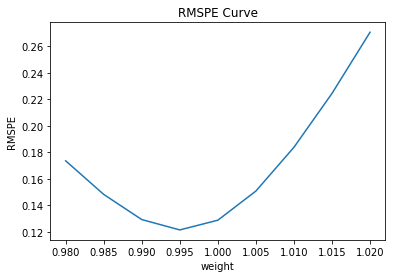

In [23]:
# rmspe correction on the whole
def correction():
    weights = np.arange(0.98, 1.02, 0.005)
    errors = []
    for w in weights:
        error = rmspe(np.expm1(y_valid), np.expm1(y_pred*w))
        errors.append(error)
        
    # make line plot
    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    # print min error
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction()

In [24]:
x_train_total.head().append(x_train_total.tail())

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
1,1,4,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,30,31,82.0,24187.75,0
2,1,3,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,29,31,82.0,24187.75,0
3,1,2,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,28,31,82.0,24187.75,0
4,1,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,27,31,82.0,24187.75,0
1017202,1115,1,1,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,7,2,24157.0,7.00,0
1017204,1115,6,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,5,1,24157.0,6.75,0
1017205,1115,5,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,4,1,24157.0,6.75,0
1017206,1115,4,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,3,1,24157.0,6.75,0
1017207,1115,3,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,2,1,24157.0,6.75,0


In [27]:
dtrain = xgb.DMatrix(x_train_total, y_train_total)
dtest = xgb.DMatrix(x_test)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 3000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


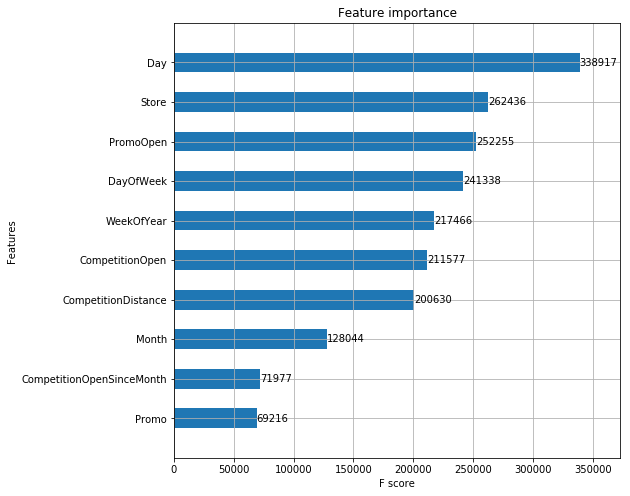

In [28]:
# make submission using best weight
result = pd.DataFrame({"Id": test["Id"],'Sales': np.expm1(preds*0.995)})
result.to_csv("submission_bgboost_file.csv", index=False)

# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()